In [1]:
#Importing the necessary modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset for training and testing the model
train_data = pd.read_csv("training.csv")
test_data = pd.read_csv("test.csv")
train_data


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [3]:
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


#### Exploring Data
Here we perform Data Cleaning, Exploratory Data Analysis and Data Pre-processing for the model

In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [6]:
train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
test_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [8]:
train_data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,165034.0,NaN,NaN,NaN,82516.5,47641.3565,0.0,41258.25,82516.5,123774.75,165033.0
CustomerId,165034.0,NaN,NaN,NaN,15692005.019026,71397.816791,15565701.0,15633141.0,15690169.0,15756824.0,15815690.0
Surname,165034,2797,Hsia,2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034.0,NaN,NaN,NaN,656.454373,80.10334,350.0,597.0,659.0,710.0,850.0
Geography,165034,3,France,94215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,Male,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034.0,NaN,NaN,NaN,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Tenure,165034.0,NaN,NaN,NaN,5.020353,2.806159,0.0,3.0,5.0,7.0,10.0
Balance,165034.0,NaN,NaN,NaN,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
NumOfProducts,165034.0,NaN,NaN,NaN,1.554455,0.547154,1.0,1.0,2.0,2.0,4.0


In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data.Exited.unique()

array([0, 1], dtype=int64)

In [11]:
train_data.Exited.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [13]:
train_data.Tenure.unique()

array([ 3,  1, 10,  2,  5,  4,  8,  6,  9,  7,  0], dtype=int64)

In [14]:
# Dividing the columns into numerical and categorical data type
num_col = ['CreditScore','Age','Balance','EstimatedSalary']
cat_col = ['Tenure', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Geography']

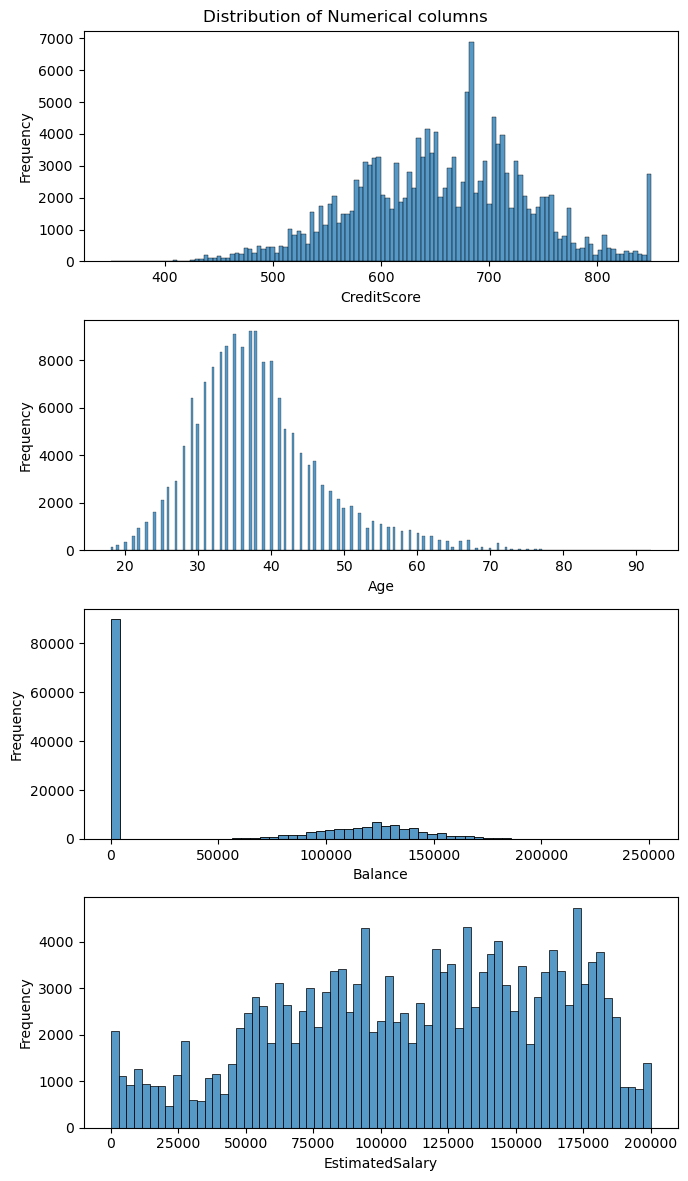

In [15]:

plt.figure(figsize=(7, 12 ))
for i, col in enumerate(num_col):
    plt.subplot(len(num_col), 1, i+1)
    sns.histplot(train_data[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Distribution of Numerical columns')
plt.tight_layout()
plt.show()

    


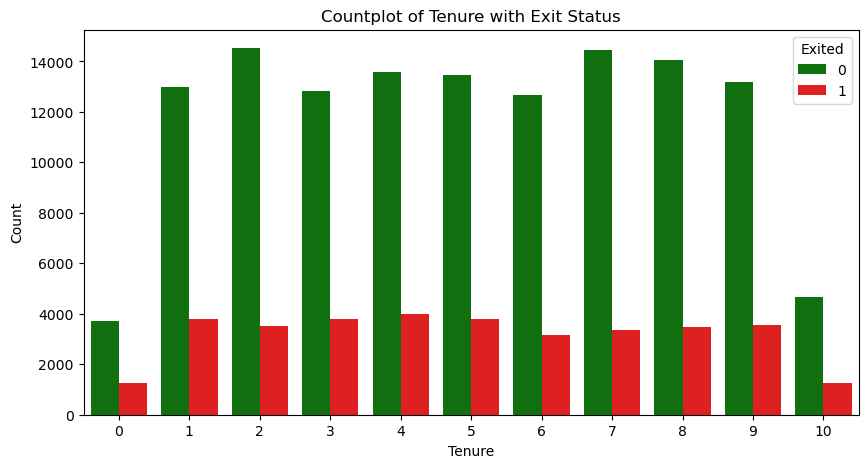

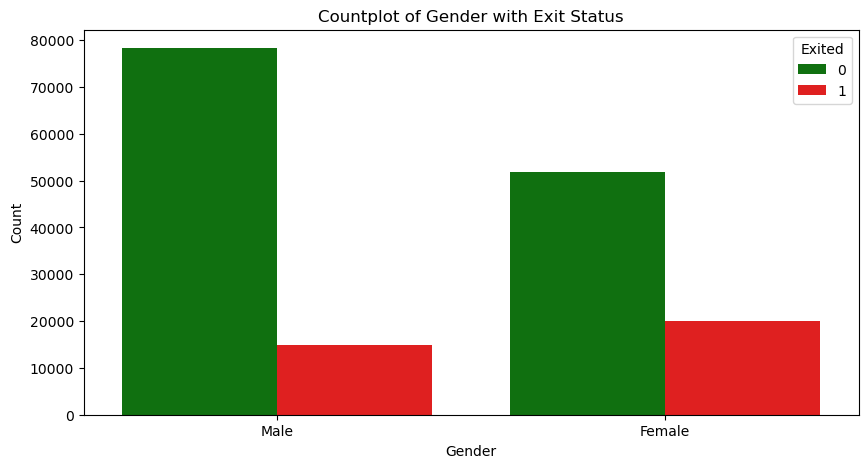

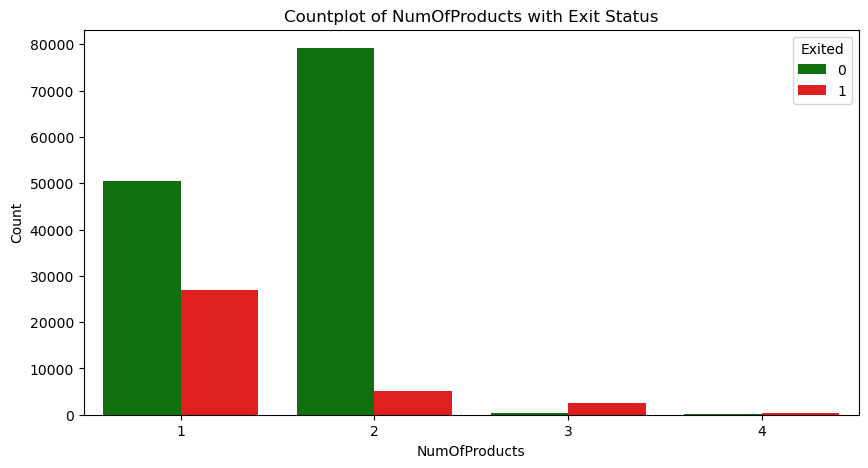

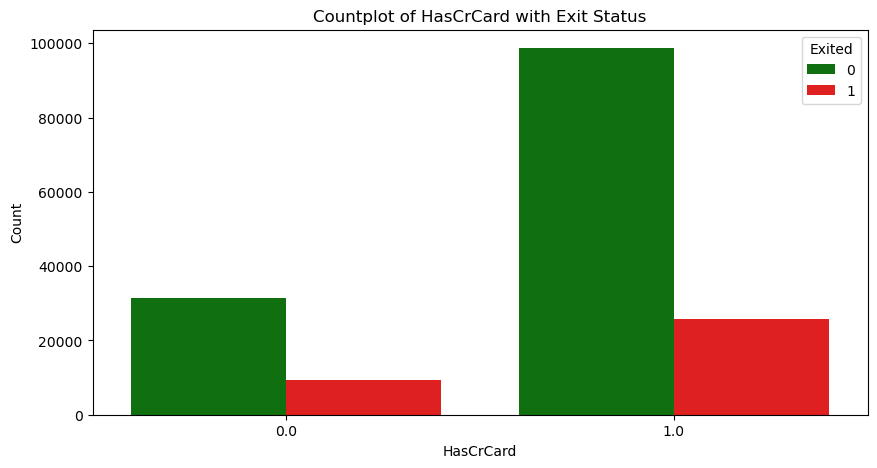

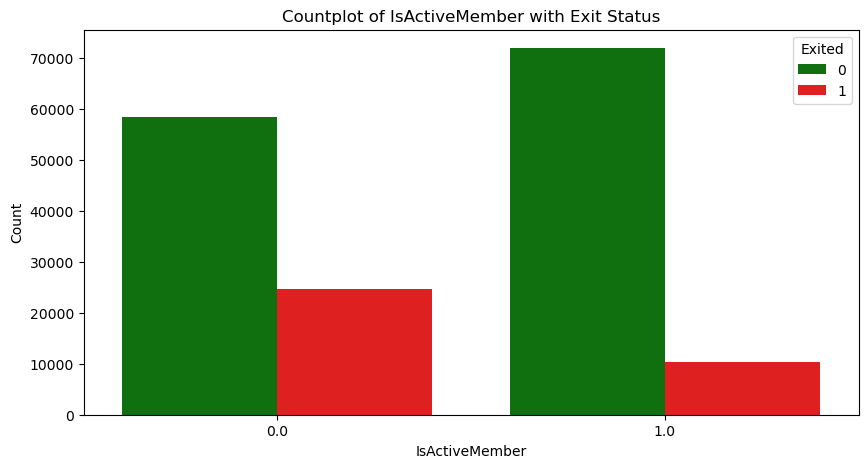

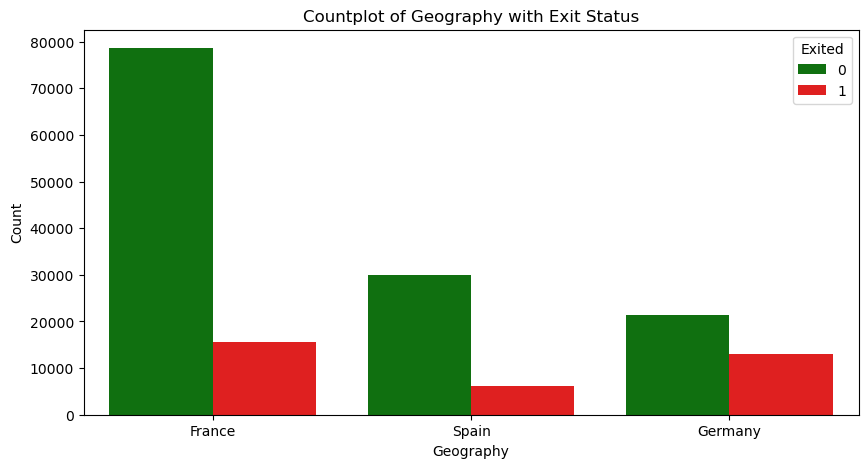

In [16]:
for cols in cat_col:
    plt.subplots(figsize = (10,5))
    sns.countplot(data = train_data,x=cols,hue='Exited',palette = {0:'green',1:'red'})
    plt.title(f'Countplot of {cols} with Exit Status')
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.show()

In [17]:
train_data.corr(numeric_only=True)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,1.000000,-0.000387,-0.001201,0.004039,-0.002560,0.000606,-0.000094,-0.004706,0.000418,-0.001552,0.002512
CustomerId,-0.000387,1.000000,0.007364,0.002696,-0.001252,-0.008348,0.004380,-0.005469,-0.002934,0.002891,-0.009947
CreditScore,-0.001201,0.007364,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,0.004039,0.002696,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,-0.002560,-0.001252,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.000606,-0.008348,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,-0.000094,0.004380,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.004706,-0.005469,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.000418,-0.002934,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001552,0.002891,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827


<Axes: >

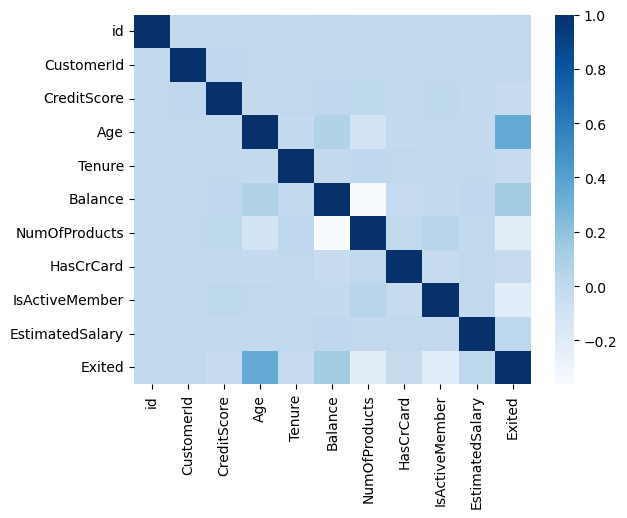

In [18]:
sns.heatmap(train_data.corr(numeric_only=True),cmap='Blues')

In [19]:
df = train_data.copy()

#### Data Preprocessing

In [20]:
train_data = train_data.drop(['id','CustomerId','Surname'],axis = 1)
train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [21]:
train_data = pd.get_dummies(train_data,columns = ['Geography','Gender'],dtype = int)


In [22]:
train_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


In [23]:
train_data.rename(columns = {'Geography_France':'France',
                            'Geography_Germany':'Germany',
                            'Geography_Spain':'Spain',
                            'Gender_Female' : 'Gender'},inplace=True)

In [24]:
train_data.drop('Gender_Male',axis = 1, inplace=True)
train_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1


In [25]:
X = train_data.drop('Exited',axis = 1)
Y = train_data[['Exited']]

In [26]:
#Importing the standard scaler to standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2, random_state = 42)

#### Building the Model
-Testing Different Models

Random Forest Classifier

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [29]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Instantiate Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Access best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Access best estimator
best_estimator = grid_search.best_estimator_
print("Best Estimator:", best_estimator)

# Perform predictions or further analysis using the best estimator

C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)


In [30]:
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [31]:
rf_model.fit(X_train, Y_train)

C:\Users\user\newfolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [32]:
Y_rf = rf_model.predict(X_test)

#### Evaluating the performance of the rf model

In [33]:
rf_model.score(X_train,Y_train)


0.870927916259553

In [34]:
rf_model.score(X_test,Y_test)

0.8656648589693096

In [35]:
Y_rf_series = pd.Series(Y_rf)
Y_test_series = Y_test['Exited']

In [36]:
confusion_matrix = pd.crosstab(Y_test_series,Y_rf_series , rownames = ['Actual'],colnames = ['Predicted'])

In [37]:
confusion_matrix

Predicted,0,1
Actual,,
0,4374,754
1,1128,222


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(classification_report(Y_test, Y_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26052
           1       0.76      0.52      0.62      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.86      0.87      0.86     33007



In [40]:
pip install catboost

In [41]:
from catboost import CatBoostClassifier

In [42]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [43]:
#Splitting the data into features and label
x = df.drop(['id','CustomerId','Surname','Exited'], axis=1)
y = df['Exited']

In [44]:
#Standardizing the featutres
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [45]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()

# Define ColumnTransformer to apply StandardScaler only to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(x)

# Convert transformed data back to DataFrame
x_scaled = pd.DataFrame(transformed_data, columns=numerical_features + categorical_features)

# View the transformed DataFrame
print(x_scaled)

       CreditScore       Age    Tenure   Balance NumOfProducts HasCrCard  \
0         0.144135 -0.578074 -0.719973 -0.883163      0.814298  0.571263   
1        -0.367706 -0.578074 -1.432694 -0.883163      0.814298  0.571263   
2         0.268974  0.211354  1.774548 -0.883163      0.814298  0.571263   
3        -0.941966 -0.465299 -1.076334  1.486918     -1.013348  0.571263   
4         0.743362 -0.578074 -0.007253 -0.883163      0.814298  0.571263   
...            ...       ...       ...       ...           ...       ...   
165029    0.131651 -0.578074 -1.076334 -0.883163     -1.013348  0.571263   
165030     1.69214 -0.352523 -0.719973 -0.883163     -1.013348 -1.750507   
165031   -1.141708 -0.803625 -0.007253 -0.883163     -1.013348  0.571263   
165032   -1.279031 -0.916401  0.705467  1.688303     -1.013348 -1.750507   
165033    2.416207 -0.803625 -1.432694 -0.883163     -1.013348  0.571263   

       IsActiveMember EstimatedSalary Geography  Gender  
0            -0.99555        

In [46]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_ctrain,X_ctest,Y_ctrain,Y_ctest = train_test_split(x_scaled,y,test_size=0.2, random_state = 42)

In [47]:
#Building and Training the model
catboost_model = CatBoostClassifier(verbose=100,iterations=1000,loss_function='Logloss',early_stopping_rounds=50, custom_metric=['AUC']) 

In [48]:
catboost_model.fit(X_ctrain, Y_ctrain,cat_features=['Geography','Gender'])

Learning rate set to 0.082881
0:	learn: 0.6191198	total: 234ms	remaining: 3m 54s
100:	learn: 0.3181243	total: 9.02s	remaining: 1m 20s
200:	learn: 0.3142910	total: 19.1s	remaining: 1m 15s
300:	learn: 0.3110762	total: 30s	remaining: 1m 9s
400:	learn: 0.3083450	total: 41.9s	remaining: 1m 2s
500:	learn: 0.3059791	total: 54.1s	remaining: 53.9s
600:	learn: 0.3037315	total: 1m 5s	remaining: 43.7s
700:	learn: 0.3014726	total: 1m 18s	remaining: 33.3s
800:	learn: 0.2992883	total: 1m 30s	remaining: 22.5s
900:	learn: 0.2973345	total: 1m 42s	remaining: 11.3s
999:	learn: 0.2954412	total: 1m 55s	remaining: 0us


In [49]:
catboost_model.score(X_ctrain,Y_ctrain)


0.8762677331151961

In [64]:
Y_cf1 = catboost_model.predict(X_ctest)

In [65]:
catboost_model.score(X_ctest,Y_ctest)

0.8683006634956222

In [70]:
Y_ctest

33042     0
36330     0
59446     1
92278     0
146750    0
         ..
32661     0
117592    0
2194      0
141678    0
20040     0
Name: Exited, Length: 33007, dtype: int64

In [71]:
Y_cf1_series = pd.Series(Y_cf1)
Y_ctest_series = Y_ctest

In [72]:
confusion_matrix1 = pd.crosstab(Y_ctest_series,Y_cf1_series , rownames = ['Actual'],colnames = ['Predicted'])

In [73]:
confusion_matrix1

Predicted,0,1
Actual,,
0,4329,799
1,1109,241


In [74]:
print(classification_report(Y_ctest, Y_cf1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



Looking at the classification report of both models it can be seen that they both have the same accuracy of 0.87. The catboost model has a slightly higher F1-score for predicting churned customers (class 1) than the randomforest model. Based on this, the catboost model  might be considered slightly better at predicting customer churn.  